<a href="https://colab.research.google.com/github/michalis0/Business-Intelligence-and-Analytics/blob/master/week6%20-%20SQL2/Correction_SQL_lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab SQL and Python

In [0]:
# Example how to read from Python
import pandas as pd
from sqlalchemy import create_engine
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

# create the database
db = create_engine('sqlite://', echo=False)

# first table
csvfile = 'https://raw.githubusercontent.com/michalis0/Business-Intelligence-and-Analytics/master/week6%20-%20SQL2/data/Players.csv'
df = pd.read_csv(csvfile)
table_name = "Players"
df.to_sql(table_name, con=db) # populate it with the data

# second table
csvfile = 'https://raw.githubusercontent.com/michalis0/Business-Intelligence-and-Analytics/master/week6%20-%20SQL2/data/Teams.csv'
df = pd.read_csv(csvfile)
table_name = "Teams"
df.to_sql(table_name, con=db) # populate it with the data



### <font color = 'green'>World Cup Data</font>

#### Look at a sample of Players and Teams tables

In [0]:
query = "SELECT * FROM Players LIMIT 5"
sql_df = pd.read_sql(query, con=db)
sql_df

,index,surname,team,position,minutes,shots,passes,tackles,saves
0,0,Abdoun,Algeria,midfielder,16,0,6,0,0
1,1,Belhadj,Algeria,defender,270,1,146,8,0
2,2,Boudebouz,Algeria,midfielder,74,3,28,1,0
3,3,Bougherra,Algeria,defender,270,1,89,11,0
4,4,Chaouchi,Algeria,goalkeeper,90,0,17,0,2


In [0]:
query = "SELECT * FROM Teams LIMIT 5"
sql_df = pd.read_sql(query, con=db)
sql_df

,index,team,ranking,games,wins,draws,losses,goalsFor,goalsAgainst,yellowCards,redCards
0,0,Brazil,1,5,3,1,1,9,4,7,2
1,1,Spain,2,6,5,0,1,7,2,3,0
2,2,Portugal,3,4,1,2,1,7,1,8,1
3,3,Netherlands,4,6,6,0,0,12,5,15,0
4,4,Italy,5,3,0,2,1,4,5,5,0



#### <font color = 'green'>World Cup Basic Queries</font>

## Question 1
What player on a team with “ia” in the team name played less than 200 minutes and made more than 100 passes? Return the player surname and team. *

__Hint: To check if attribute A contains string S use "A like '%S%'" __

In [0]:
query = """
select surname, team 
from Players 
where Players.team like '%ia%' AND Players.minutes < 200 
AND Players.passes > 100
"""
sql_df = pd.read_sql(query, con=db)
sql_df

,surname,team
0,Kuzmanovic,Serbia


## Question 2.1
Use seaborn to find if their is correlation for players between: `minutes`,`shots`, `minutes`,`passes`, `tackles`. 

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:98: UserWarning: The handle <matplotlib.patches.Patch object at 0x7f7ca1ef0f28> has a label of '_nolegend_' which cannot be automatically added to the legend.
  figlegend = self.fig.legend(handles, labels, **kwargs)


,index,minutes,shots,passes,tackles,saves
index,1.000000,0.072236,0.011117,0.011606,0.018683,0.013302
minutes,0.072236,1.000000,0.407923,0.815119,0.610673,0.228477
shots,0.011117,0.407923,1.000000,0.343163,0.176283,-0.154958
passes,0.011606,0.815119,0.343163,1.000000,0.702097,-0.062057
tackles,0.018683,0.610673,0.176283,0.702097,1.000000,-0.201190
saves,0.013302,0.228477,-0.154958,-0.062057,-0.201190,1.000000


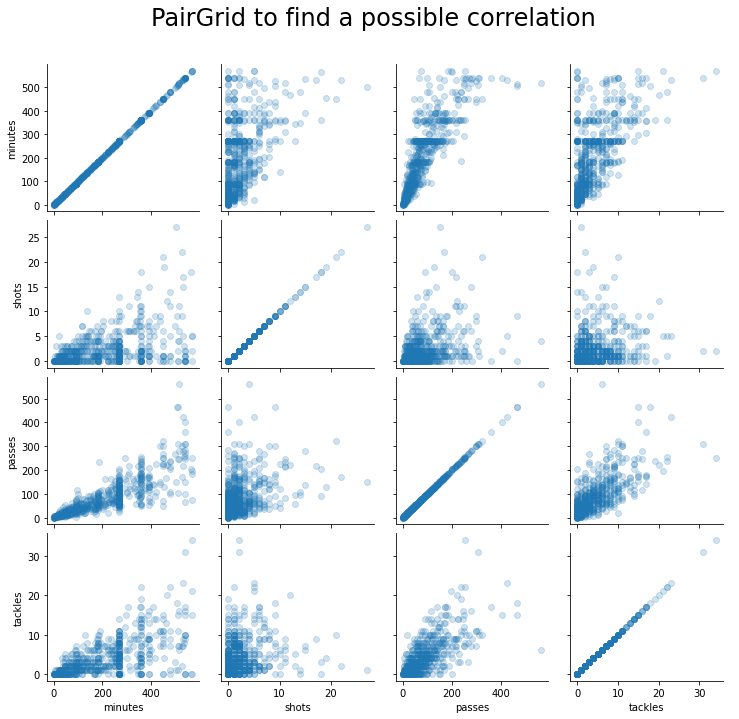

In [0]:
#hints: you need to do a query and have a look of the last plot of the:"walkthroughs  week 3 BIA" 
query = "SELECT * FROM Players"
sql_df = pd.read_sql(query, con=db)
sql_df
g = sns.PairGrid(sql_df, vars=['minutes', 'shots', 'passes', 'tackles'],
                 palette='pale red')
g.map(plt.scatter, alpha=0.2)
plt.subplots_adjust(top=0.9)
g.fig.suptitle('PairGrid to find a possible correlation', size=24)
g.add_legend();

sql_df.corr(method='pearson')

## Question 2.2
 Find all players who made more than 20 shots. Return all player information in descending order of shots made.*

__Hint: SQL ordering syntax: "ORDER BY column1, column2, ... ASC|DESC" __

In [0]:
query = """
select * 
from Players 
where Players.shots > 20 
order by Players.shots desc
"""
sql_df = pd.read_sql(query, con=db)
sql_df

,index,surname,team,position,minutes,shots,passes,tackles,saves
0,200,Gyan,Ghana,forward,501,27,151,1,0
1,535,Villa,Spain,forward,529,22,169,2,0
2,28,Messi,Argentina,forward,450,21,321,10,0


## Question 3.1 SQL
Find the goalkeepers of teams that played more than four games. List the surname of the goalkeeper, the team, and the number of minutes the goalkeeper played.*

__Hint: You should join the two tables (on which attribute??).

In [0]:
query = """
select P.surname, P.team, P.minutes
from Players P
join Teams T on T.team = P.team
where P.position like 'goalkeeper' and (P.minutes/90) >= 4
order by P.minutes desc
"""
sql_df = pd.read_sql(query, con=db)
sql_df

,surname,team,minutes
0,Muslera,Uruguay,570
1,Neuer,Germany,540
2,Stekelenburg,Netherlands,540
3,Casillas,Spain,540
4,Kingson,Ghana,510
5,Villar,Paraguay,480
6,Romero,Argentina,450
7,Julio Cesar,Brazil,450
8,Kawashima,Japan,390
9,Howard,USA,390


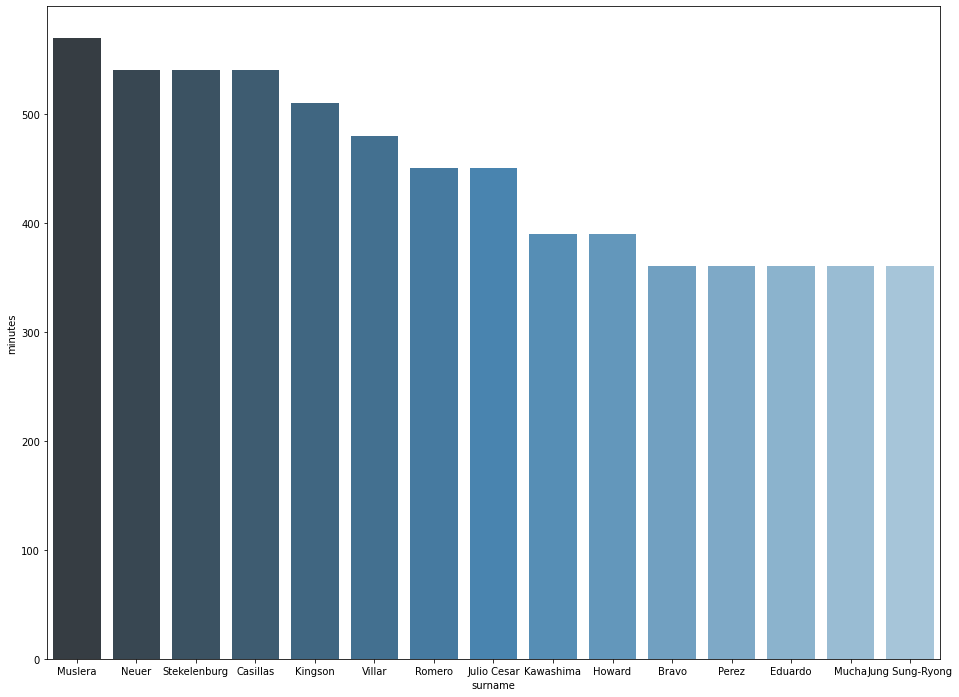

In [0]:
fig = plt.gcf() #the aera of the plt figure
fig.set_size_inches(16, 12) #resize the figure
ax = sns.barplot(x="surname", y="minutes", data=sql_df, palette="Blues_d")
plt.show() 

## Question 4
How many players who play on a team with ranking <10 played more than 350 minutes? Return one number in a column named 'superstar'.*

__Hint: use "SELECT ... AS new_col_name" to rename a column__

In [0]:
query = """
select count(P.surname) as 'superstar'
from Players P
join Teams T on T.team = P.team
where P.minutes > 350 and T.ranking < 10

"""
sql_df = pd.read_sql(query, con=db)
sql_df

,superstar
0,54


## Question 5
What is the average number of passes made by forwards? By midfielders? Write one query that gives both values with the corresponding position.*

__Hint: use the GROUP BY clause__

__Hint: when selecting columns you can use AVG, SUM or COUNT clauses to calculate aggregates__

In [0]:
query = """
select P.position, round(avg(P.passes)) as 'moyenne de passe'
from Players P
where P.position = "forward" or P.position = "midfielder"
group by P.position
"""
sql_df = pd.read_sql(query, con=db)
sql_df

,position,moyenne de passe
0,forward,51.0
1,midfielder,95.0


In [0]:
query = """
SELECT avg(P.passes) as AVG_Passes, P.position
FROM Players P
WHERE P.position like 'forwards' or P.position like 'midfielders'
GROUP BY P.position
"""
sql_df = pd.read_sql(query, con=db)
sql_df

,AVG_Passes,position


*6) Which team has the highest average number of passes per minute played? Return the team and average passes per minute. *

__Hint 1: You can compute a team's average number of passes per minute played by dividing the total number of passes by the total number of minutes. To force floating point division, multiply one operand by 1.0. __

__Hint 2: Consider using Limit. __

In [0]:
query = """
select T.team, round(sum(P.passes)/(90.0*T.games),2) as 'PpMin played'
from Players P
join Teams T on T.team = P.team
group by T.team
limit 5

"""
sql_df = pd.read_sql(query, con=db)
sql_df

,team,PpMin played
0,Algeria,4.07
1,Argentina,5.81
2,Australia,4.26
3,Brazil,5.32
4,Cameroon,4.98


#### <font color = 'green'>World Cup Advanced Queries</font>

## Question 1

Find all pairs of teams who have the same number of goalsFor as
each other and the same number of goalsAgainst as each other.
Return the teams and numbers of goalsFor and goalsAgainst.
Make sure to return each pair only once.*

__Hint: You basically need to do a self join of the Teams table. For that you need to join different name aliases of the Teams table. checkout [here](https://www.w3schools.com/sql/sql_join_self.asp) for help.__

In [0]:
query = """
select A.team AS team_1, B.team AS team_2, A.goalsFor, A.goalsAgainst
from Teams A, Teams B
where A.goalsFor = B.goalsFor and A.goalsAgainst=B.goalsAgainst and A.team <>B.team
"""
sql_df = pd.read_sql(query, con=db)
sql_df


,team_1,team_2,goalsFor,goalsAgainst
0,Italy,Mexico,4,5
1,England,Chile,3,5
2,England,Nigeria,3,5
3,England,South Africa,3,5
4,Greece,Cameroon,2,5
5,Mexico,Italy,4,5
6,Chile,England,3,5
7,Chile,Nigeria,3,5
8,Chile,South Africa,3,5
9,Cameroon,Greece,2,5


## Question 2
Find all teams with ranking <30 where no player made more than 150 passes. Return the team and ranking.*

__Hint: use HAVING clause (documentation [here](https://www.w3schools.com/sql/sql_having.asp))__

In [0]:
query = """
select P.team, T.ranking, max(P.passes) as maxPasses
from Players P
join Teams T on T.team = P.team
where T.ranking < 30
group by P.team
having maxPasses<150
"""
sql_df = pd.read_sql(query, con=db)
sql_df

,team,ranking,maxPasses
0,France,9,125
1,Nigeria,21,111
2,Switzerland,24,138


## Question 3
Which team has the highest ratio of goalsFor to goalsAgainst?*

In [0]:
query = """
select team, goalsFor, goalsAgainst,goalsFor/goalsAgainst as Ratio
from Teams
group by team
order by ratio desc
limit 1
"""
sql_df = pd.read_sql(query, con=db)
sql_df

,team,goalsFor,goalsAgainst,Ratio
0,Portugal,7,1,7


## Question 4
Find all teams whose defenders averaged more than 150 passes. Return the team and average number of passes by defenders, in descending order of average passes.*

__Hint: again you may use the HAVING clause here__

In [0]:
query = """
select P.team, avg(P.passes) as avg_Passes
from Players P
where P.position ='defender'
group by P.team
having avg_Passes > 150
order by avg_Passes desc
"""
sql_df = pd.read_sql(query, con=db)
sql_df

,team,avg_Passes
0,Spain,213.000000
1,Brazil,190.000000
2,Germany,189.833333
3,Netherlands,182.500000
4,Mexico,152.142857


# <font color = 'green'>Titanic Data</font>

In [0]:
# Load table from CSV file
import pandas as pd
from sqlalchemy import create_engine

# create the database
db = create_engine('sqlite://', echo=False)

# Titanic table
csvfile = 'https://raw.githubusercontent.com/michalis0/Business-Intelligence-and-Analytics/master/week6%20-%20SQL2/data/Titanic.csv'
df = pd.read_csv(csvfile)
table_name = "Titanic"
df.to_sql(table_name, con=db) # populate it with the data

## Look at sample of Titanic table

In [0]:
query = """
select * from Titanic 

"""
sql_df = pd.read_sql(query, con=db)
sql_df.head()

,index,last,first,gender,age,class,fare,embarked,survived
0,0,Braund,Mr. Owen Harris,M,22.0,3,7.2500,Southampton,no
1,1,Cumings,Mrs. John Bradley (Florence Briggs Thayer),F,38.0,1,71.2833,Cherbourg,yes
2,2,Heikkinen,Miss Laina,F,26.0,3,7.9250,Southampton,yes
3,3,Futrelle,Mrs. Jacques Heath (Lily May Peel),F,35.0,1,53.1000,Southampton,yes
4,4,Allen,Mr. William Henry,M,35.0,3,8.0500,Southampton,no


## <font color = 'green'>Titanic Basic Queries</font>

## Question 1
How many married women over age 50 embarked in Cherbourg? Note: To check if attribute A begins with string S use "A like 'S%'"*

In [0]:
query = """

select count(*) from Titanic where Titanic.gender == 'F' 
AND Titanic.embarked like 'Cherbourg%'
AND Titanic.age > 50

"""
sql_df = pd.read_sql(query, con=db)
sql_df

,count(*)
0,6


## Question 2.1
Create a boxplot the fare paid by passengers in each of the embarkation cities.

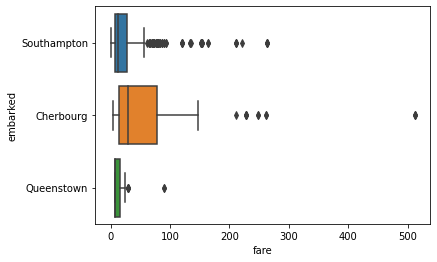

In [0]:
#use seaborn
query = """
select * from Titanic 

"""
sql_df = pd.read_sql(query, con=db)
sql_df.head()

ax = sns.boxplot(x="fare", y="embarked", data=sql_df)

## Question 2.2 
List the average fare paid by passengers in each of the embarkation cities (along with the city), in descending order of average fare.*

In [0]:
query = """

select t.embarked, round(AVG(fare),2) as mean from Titanic as T
group by t.embarked
order by mean desc

"""
sql_df = pd.read_sql(query, con=db)
sql_df

,embarked,mean
0,Cherbourg,59.95
1,Southampton,27.24
2,Queenstown,13.28


## Question 3.1 
What's the most common last name among passengers?*

In [0]:
query = """

select last, count(last) as total 
from Titanic 
group by last 
order by count(last) desc 
limit 5

"""
sql_df = pd.read_sql(query, con=db)
sql_df

,last,total
0,Andersson,9
1,Sage,7
2,Carter,6
3,Goodwin,6
4,Johnson,6


## Question 3.2 
Use barplot to visualize and order the previous data.

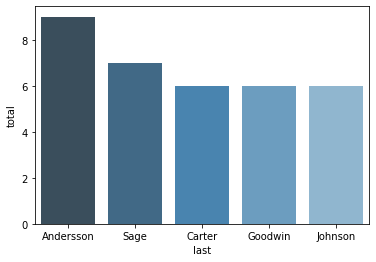

In [0]:
#you can use seaborn or matplolib
ax = sns.barplot(x="last", y="total", data=sql_df, palette="Blues_d")
plt.show() 

## Question 3.3 
Write three queries: the total number of passengers; the number of passengers under 30; the number of passengers 30 or older. Why do the second and third numbers not add up to the first?*

In [0]:
query = """
select count(*) as total_number 
from Titanic

"""
sql_df = pd.read_sql(query, con=db)
sql_df

,total_number
0,891


In [0]:
query = """

select count(*) as total_number_u30 
from Titanic 
where age<30

"""
sql_df = pd.read_sql(query, con=db)
sql_df

,total_number_u30
0,384


In [0]:
query = """

select count(*) as total_number_a30 
from Titanic 
where age>=30

"""
sql_df = pd.read_sql(query, con=db)
sql_df

,total_number_a30
0,330


## Question 5 
Blanks in SQL tables are given a special value called 'null', and conditions 'A is null' and 'A is not null' can be used in Where clauses to check whether attribute A has the 'null' value. How many passengers don't have a value for age? Now do your numbers add up?*

In [0]:
query = """

select count(*) as total_number_null 
from Titanic 
where age is null

"""
sql_df = pd.read_sql(query, con=db)
sql_df

,total_number_null
0,177


## Question 6 
For male survivors, female survivors, male non-survivors, and female non-survivors, how many passengers were in each of those four categories and what was their average fare paid?*

In [0]:
query = """

select 
 case 
    when (gender like 'M' and survived like 'yes') then 'male survivors'
    when (gender like 'M' and survived like 'no') then 'male non-survivors'
    when (gender like 'F' and survived like 'no') then 'female non-survivors'
    when (gender like 'F' and survived like 'yes') then 'female survivors'
  end as status,
  count (*) as total_passenger, round(AVG(fare),2) as mean_fare
from Titanic
group by status
order by mean_fare desc

"""
sql_df = pd.read_sql(query, con=db)
sql_df

,status,total_passenger,mean_fare
0,female survivors,233,51.94
1,male survivors,109,40.82
2,female non-survivors,81,23.02
3,male non-survivors,468,21.96
